In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
df_transitions = pd.read_csv('transitions.csv')
np.unique(df_transitions.loc[df_transitions.r > 0].s)

array([23, 78], dtype=int64)

In [3]:
from collections import defaultdict
import random, time

# Some hyperparameters for Q learning
learning_rate = 0.2
discount = 0.9
epsilon = 0.05

# Q table is initialized as a default dictionary
q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])

# traverse the csv file row by row for n times
start_time = time.time()
n = 20
for _ in range(n):
    print('{}/{}'.format(_+1, n))
    for index, row in df_transitions.iterrows():
        start_state = int(row['s'])
        action = int(row['a'])
        next_state = int(row['sp'])
        reward = float(row['r'])

        # if the action is not the optimal action based on current q tabel, (1-epsilon) chance to skip this row and do not update the q table.
        if action != np.argmax(q_table[start_state])+1 and np.max(q_table[start_state]) != 0:
            if random.uniform(0, 1) > epsilon:
                # print(action, np.argmax(q_table[start_state])+1)
                continue


        # current q = previous q + learning rate * (reward + discount * the max q value of next state - previous q)
        q_table[start_state][action-1] += learning_rate * (reward + discount * max(q_table[next_state]) - q_table[start_state][action-1])
print('Total time cost: {:.3f} seconds'.format(time.time()-start_time))

1/20
2/20
3/20
4/20
5/20
6/20
7/20
8/20
9/20
10/20
11/20
12/20
13/20
14/20
15/20
16/20
17/20
18/20
19/20
20/20
Total time cost: 45.746 seconds


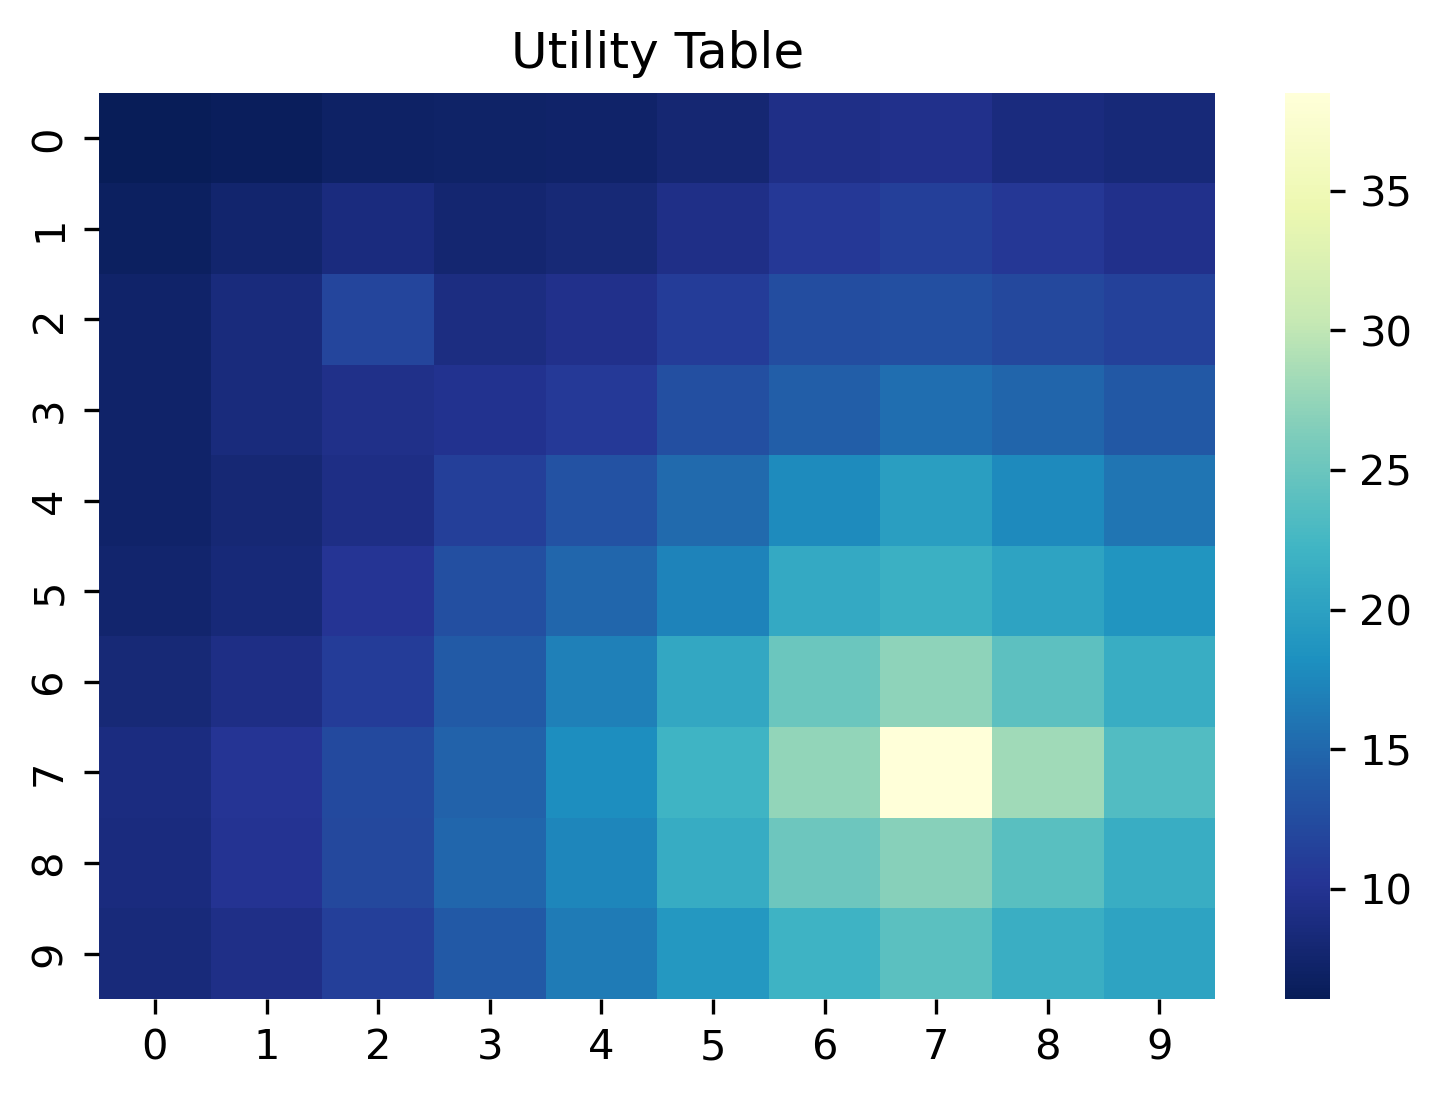

In [4]:
utility_table = np.array([np.mean(q_table[i+1]) for i in range(100)]).reshape(10, 10)
plt.rcParams['figure.dpi'] = 300
ax = plt.axes()
seaborn.heatmap(utility_table, cmap="YlGnBu_r")
ax.set_title('Utility Table')
plt.show()

In [5]:
policy_table = np.array([np.argmax(q_table[i+1]) for i in range(100)]).reshape(10, 10)
policy_table

array([[2, 2, 2, 2, 2, 2, 2, 2, 0, 2],
       [1, 2, 2, 1, 2, 2, 2, 2, 2, 0],
       [1, 1, 2, 2, 2, 1, 2, 2, 2, 2],
       [3, 1, 3, 2, 2, 1, 1, 2, 2, 2],
       [1, 2, 1, 1, 2, 2, 2, 2, 2, 2],
       [1, 1, 2, 1, 1, 2, 2, 2, 0, 2],
       [2, 1, 1, 2, 1, 1, 2, 2, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 3, 3, 0, 0],
       [1, 1, 1, 1, 3, 3, 3, 3, 3, 0]], dtype=int64)

In [6]:
policy = {i+1: np.argmax(q_table[i+1]) for i in range(100)}
with open('part1.policy', 'w') as f:
    for index in policy:
        f.writelines("{}, {}\n".format(index, policy[index]))